## Santander Customer Transaction Prediction

### To predict if the customer will make the transaction or not.

In [2]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the datasets.
my_data = pd.read_csv('train.csv',delimiter=",")
my_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
#Checking the dataframe
my_data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


We see that our target value has only two values that is 0 and 1 that is there are two categories we need to predict:

1)Customer make the transaction : 1

2)Customer does not make the transaction : 0

## Visualisations of first 6 variables

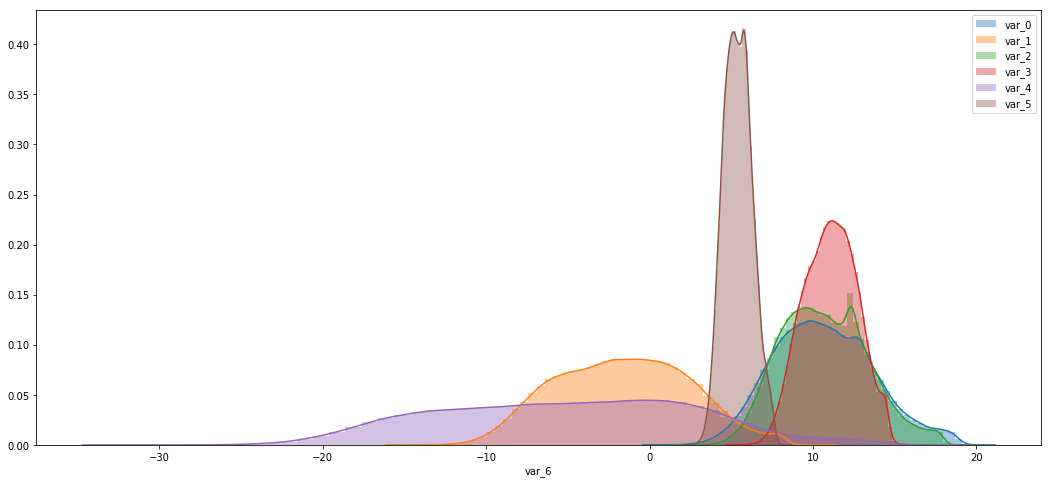

In [5]:
plt.figure(figsize=(18,8))
sns.distplot(my_data.var_0,label='var_0')
sns.distplot(my_data.var_1,label='var_1')
sns.distplot(my_data.var_2,label='var_2')
sns.distplot(my_data.var_4,label='var_3')
sns.distplot(my_data.var_5,label='var_4')
sns.distplot(my_data.var_6,label='var_5')
plt.legend()

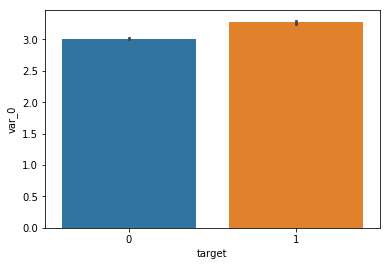

In [6]:
sns.barplot(y='var_0',x='target',data=my_data,estimator=np.std)

In [15]:
lst = []
for i in range(200):
    lst.append("var_"+str(i))

In [16]:
x = my_data[lst].values
x[0:5]


array([[ 8.92550e+00, -6.78630e+00,  1.19081e+01,  5.09300e+00,
         1.14607e+01, -9.28340e+00,  5.11870e+00,  1.86266e+01,
        -4.92000e+00,  5.74700e+00,  2.92520e+00,  3.18210e+00,
         1.40137e+01,  5.74500e-01,  8.79890e+00,  1.45691e+01,
         5.74870e+00, -7.23930e+00,  4.28400e+00,  3.07133e+01,
         1.05350e+01,  1.62191e+01,  2.57910e+00,  2.47160e+00,
         1.43831e+01,  1.34325e+01, -5.14880e+00, -4.07300e-01,
         4.93060e+00,  5.99650e+00, -3.08500e-01,  1.29041e+01,
        -3.87660e+00,  1.68911e+01,  1.11920e+01,  1.05785e+01,
         6.76400e-01,  7.88710e+00,  4.66670e+00,  3.87430e+00,
        -5.23870e+00,  7.37460e+00,  1.15767e+01,  1.20446e+01,
         1.16418e+01, -7.01700e+00,  5.92260e+00, -1.42136e+01,
         1.60283e+01,  5.32530e+00,  1.29194e+01,  2.90460e+01,
        -6.94000e-01,  5.17360e+00, -7.47400e-01,  1.48322e+01,
         1.12668e+01,  5.38220e+00,  2.01830e+00,  1.01166e+01,
         1.61828e+01,  4.95900e+00,  2.0

In [17]:
x

array([[  8.9255,  -6.7863,  11.9081, ...,   8.5635,  12.7803,  -1.0914],
       [ 11.5006,  -4.1473,  13.8588, ...,   8.7889,  18.356 ,   1.9518],
       [  8.6093,  -2.7457,  12.0805, ...,   8.2675,  14.7222,   0.3965],
       ...,
       [ 11.2232,  -5.0518,  10.5127, ...,   8.7155,  13.8329,   4.1995],
       [  9.7148,  -8.6098,  13.6104, ...,  10.0342,  15.5289, -13.9001],
       [ 10.8762,  -5.7105,  12.1183, ...,   8.1857,  12.1284,   0.1385]])

In [18]:
y = my_data['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Creating training and test set form the given dataset 

In [19]:
#importing the train test split function
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=3)

### Creating the model

#### We have chosen Decision tree as our predicting model as we have to predict a binary value that is 0 or 1.

In [36]:
transacttree = DecisionTreeClassifier(criterion='entropy',max_depth=6)
transacttree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
x_test

array([[ 12.0561,   2.1824,   7.3961, ...,  10.6516,  16.7736, -12.8289],
       [ 12.    ,  -1.842 ,  13.6457, ...,   8.3684,  13.8358,  -4.7492],
       [ 13.6582,  -9.2735,   7.6773, ...,   7.2928,  12.5663,   2.7667],
       ...,
       [  8.1949,  -5.5662,   9.9934, ...,   8.71  ,  20.4244,  -0.1902],
       [  9.972 ,  -0.5523,   8.8656, ...,  10.1252,  19.1736, -14.8838],
       [  8.0731,  -5.3099,   9.2284, ...,   7.4966,  17.3919, -18.3514]])

### Training the model 

In [37]:
transacttree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predicting the values from the test set.

In [39]:
predtree = transacttree.predict(x_test)

In [41]:
print (predtree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
158707    0
135082    0
190077    0
20142     0
21163     0
Name: target, dtype: int64


### Calculating accuracy of the model.

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy: ", metrics.accuracy_score(y_test,predtree))

Accuracy:  0.89685


## We achieve an accuracy of almost 90 percent.